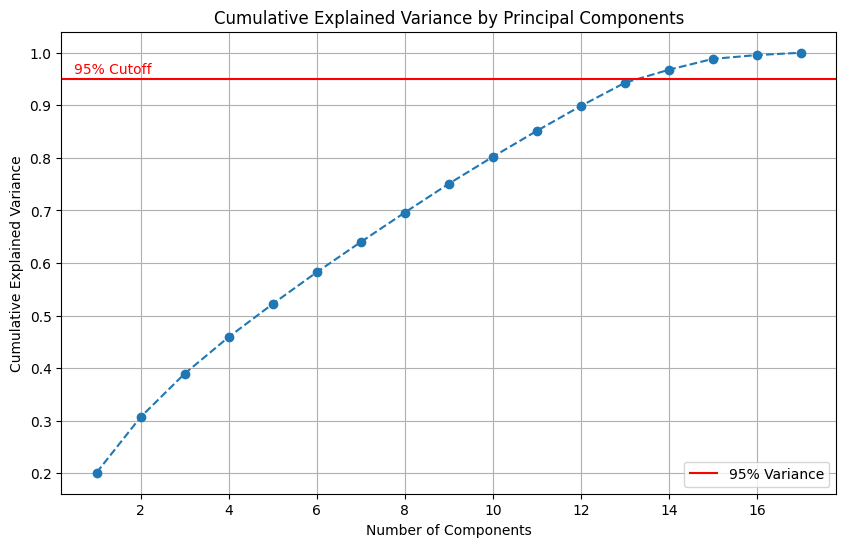

Number of components needed to explain 95% variance: 14


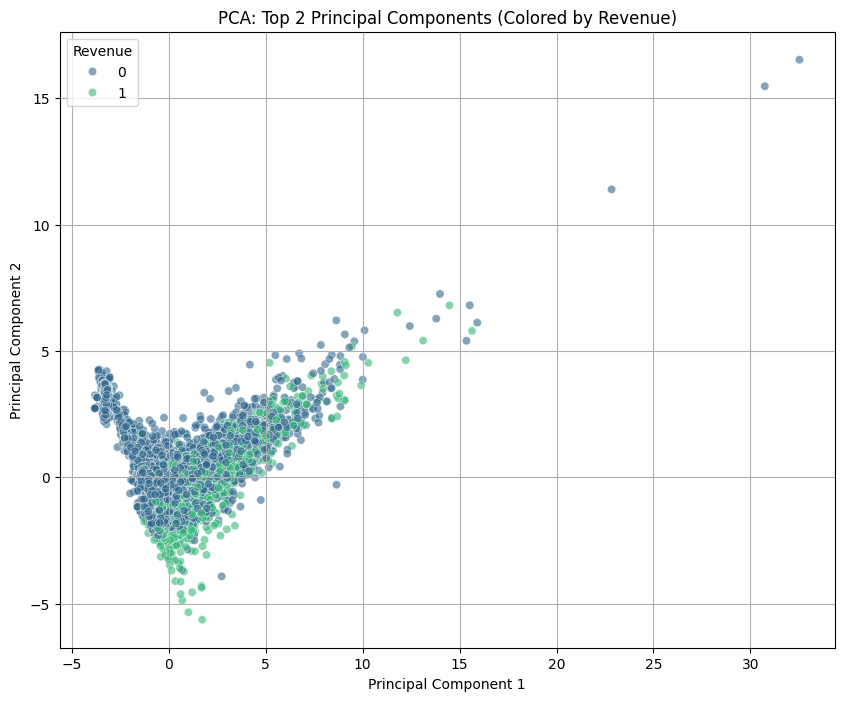


Feature contributions to PC1 and PC2:
                              PC1       PC2
Administrative           0.380766  0.029573
Administrative_Duration  0.327172  0.073692
Informational            0.346332  0.244308
Informational_Duration   0.294305  0.260309
ProductRelated           0.410349  0.178310


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# 1. Load the dataset
# Ensure the file is in your working directory
url = 'https://raw.githubusercontent.com/akay6483/mmml-ecommerce/refs/heads/main/dataset/online_shoppers_intention.csv'
df = pd.read_csv(url)

# 2. Preprocessing
# Identify categorical columns that need encoding
categorical_cols = ['Month', 'VisitorType', 'Weekend', 'Revenue']

# Create a copy to avoid modifying the original dataframe in memory
df_pca = df.copy()

# Encode categorical variables to numeric
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_pca[col] = le.fit_transform(df_pca[col])

# Separate features (X) and target (y)
# We drop 'Revenue' from X because it's the target we want to predict/visualize
X = df_pca.drop('Revenue', axis=1)
y = df_pca['Revenue'] # Storing target for visualization

# Standardize the features (Important for PCA)
# PCA is affected by scale, so we normalize to mean=0, std=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA
# Initialize PCA. We start without defining n_components to analyze variance ratio first
pca = PCA()
pca.fit(X_scaled)

# Calculate cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# 4. Plotting Cumulative Explained Variance (Scree Plot)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance')
plt.text(0.5, 0.96, '95% Cutoff', color = 'red', fontsize=10)
plt.grid(True)
plt.legend()
plt.show()

# Check how many components are needed to explain 95% of the variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components needed to explain 95% variance: {n_components_95}")

# 5. Transform data using the top 2 components for 2D Visualization
pca_2 = PCA(n_components=2)
principalComponents = pca_2.fit_transform(X_scaled)

# Create a DataFrame for the 2 components
pca_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
pca_df['Revenue'] = y  # Add the target variable back for color coding

# Plot the first 2 Principal Components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Revenue', data=pca_df, palette='viridis', alpha=0.6)
plt.title('PCA: Top 2 Principal Components (Colored by Revenue)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Optional: View the loadings (coefficients) to interpret PC1 and PC2
loadings = pd.DataFrame(pca_2.components_.T, columns=['PC1', 'PC2'], index=X.columns)
print("\nFeature contributions to PC1 and PC2:")
print(loadings.head())